In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
from tradingcore.execution_manager import ExecutionManager
from tradingcore.campaign import Campaign
from tradingcore.account import Account
from tradingcore.moneymanagement import PlainMM

from exobuilder.data.datasource_mongo import DataSourceMongo
from exobuilder.data.datasource_sql import DataSourceSQL
from exobuilder.data.assetindex_mongo import AssetIndexMongo
from exobuilder.data.exostorage import EXOStorage

import pprint

In [3]:
try:
    from .settings import *
except SystemError:
    from scripts.settings import *

try:
    from .settings_local import *
except SystemError:
    try:
        from scripts.settings_local import *
    except ImportError:
        pass
    pass

In [4]:
assetindex = AssetIndexMongo(MONGO_CONNSTR, MONGO_EXO_DB)
storage = EXOStorage(MONGO_CONNSTR, MONGO_EXO_DB)
#datasource = DataSourceSQL(SQL_HOST, SQL_USER, SQL_PASS, assetindex, futures_limit=10, options_limit=10)
datasource = DataSourceMongo(MONGO_CONNSTR, MONGO_EXO_DB, assetindex, futures_limit=10, options_limit=10, exostorage=storage)


In [5]:
exmgr = ExecutionManager(MONGO_CONNSTR, datasource, dbname=MONGO_EXO_DB)

In [21]:
campaigns = exmgr.campaign_load_all()
accounts = exmgr.account_load_all()
pp = pprint.PrettyPrinter(indent=4)

## List of available campaigns

In [22]:
[print(x) for x in campaigns.keys()];

ZN_Bull
NG_Bear
ZC_Bear
CL_Bidirectional
NG_Bidirectional
NG_Bull
CL_Bullish
ES_Bull
CL_Bear
ZW_Bear
ZN_Bear
CL_Bull
ZS_Bear
CL_Sample
test_campaign
ES_Bear
ZW_Bull
ZS_Bull


In [8]:
swm_info = storage.swarms_info()
pp.pprint(swm_info)

{   '_id': None,
    'alphas': [   'BollingerBands',
                  'RenkoPatternsNoExits',
                  'SwingPoint',
                  'EXO',
                  'PointAndFigure',
                  'IchimokuCloud',
                  'MACross',
                  'BolllingerBands'],
    'exo_types': [   'Quandl-EXO-CL-CallSpread',
                     'SMART',
                     'SmartEXO',
                     'CallSpread',
                     'PutSpread',
                     'ContFut',
                     'BullishCollarBW',
                     'BearishCollarBW'],
    'instruments': ['ZC', 'NG', 'ZN', 'ES', 'ZS', 'CL', 'ZW']}


# Alphas list

In [9]:
instruments_filter = ['NG']  # Select ALL
#instruments_filter = ['ES', 'CL']

exo_filter = ['*'] # Select ALL
#exo_filter = ['BullishCollar']

direction_filter = [0, -1, 1] # Select ALL
#direction_filter = [1]

alpha_filter = ['*']  # Select ALL
#alpha_filter = ['MaCross', 'PointAndFigurePatterns']

swmdf, swm_data = storage.swarms_list(instruments_filter, direction_filter, alpha_filter, exo_filter)

[print(s) for s in sorted(swmdf.columns)];

NG_BearishCollarBW_Long_EXO
NG_BearishCollarBW_Short_EXO
NG_BullishCollarBW_Long_EXO
NG_BullishCollarBW_Short_EXO
NG_CallSpread_Long_BollingerBands_alt2-bullish-custom
NG_CallSpread_Long_BollingerBands_alt3-bullish-custom
NG_CallSpread_Long_BollingerBands_bullish-custom
NG_CallSpread_Long_BolllingerBands
NG_CallSpread_Long_BolllingerBands_alt2-bullish-custom
NG_CallSpread_Long_BolllingerBands_alt3-bullish-custom
NG_CallSpread_Long_BolllingerBands_bullish-custom
NG_CallSpread_Long_EXO
NG_CallSpread_Long_IchimokuCloud
NG_CallSpread_Long_IchimokuCloud_bullish-custom
NG_CallSpread_Long_SwingPoint
NG_CallSpread_Long_SwingPoint_bearish-custom
NG_CallSpread_Long_SwingPoint_bullish-custom
NG_CallSpread_Short_EXO
NG_CallSpread_Short_MACross
NG_CallSpread_Short_MACross_bearish-custom
NG_CallSpread_Short_SwingPoint
NG_CallSpread_Short_SwingPoint_bearish-custom
NG_ContFut_Long_EXO
NG_ContFut_Short_EXO
NG_PutSpread_Long_BollingerBands_alt2-bearish-custom
NG_PutSpread_Long_BollingerBands_bearish-cus

In [10]:
passive_exo = {}

exo_filter = '*'     # All 
#exo_filter = 'ES_'  # ES only
exo_filter = 'NG*'  # ES Collars (incl Bearish, Bullish, BW and vanilla)


print('==== Passive EXO list')
for exo_name in storage.exo_list(exo_filter):
    passive_exo[exo_name], exo_dict = storage.load_series(exo_name)

for exo in sorted(passive_exo.keys()):
    print(exo)
    
print('==== Alphas EXO list')
[print(s) for s in sorted(swmdf.columns)];

==== Passive EXO list
CL_SMART_Ichimoku_Long
ES_SMART_Ichimoku_Long
NG_BearishCollarBW
NG_BullishCollarBW
NG_CallSpread
NG_ContFut
NG_PutSpread
NG_SMART_Ichimoku_Long
NG_SmartEXO_Bullish_Ichi_Short_Put_Spread_150Delta_Bi
NG_SmartEXO_Ichi_Call_Spread_150Delta_Bi
NG_SmartEXO_Ichi_Put_Spread_150Delta_Bi
NG_SmartEXO_Ichi_Put_Spread_150Delta_Bi_no_neutral
ZC_SMART_Ichimoku_Long
ZN_SMART_Ichimoku_Long
ZS_SMART_Ichimoku_Long
ZW_SMART_Ichimoku_Long
==== Alphas EXO list
NG_BearishCollarBW_Long_EXO
NG_BearishCollarBW_Short_EXO
NG_BullishCollarBW_Long_EXO
NG_BullishCollarBW_Short_EXO
NG_CallSpread_Long_BollingerBands_alt2-bullish-custom
NG_CallSpread_Long_BollingerBands_alt3-bullish-custom
NG_CallSpread_Long_BollingerBands_bullish-custom
NG_CallSpread_Long_BolllingerBands
NG_CallSpread_Long_BolllingerBands_alt2-bullish-custom
NG_CallSpread_Long_BolllingerBands_alt3-bullish-custom
NG_CallSpread_Long_BolllingerBands_bullish-custom
NG_CallSpread_Long_EXO
NG_CallSpread_Long_IchimokuCloud
NG_CallSprea

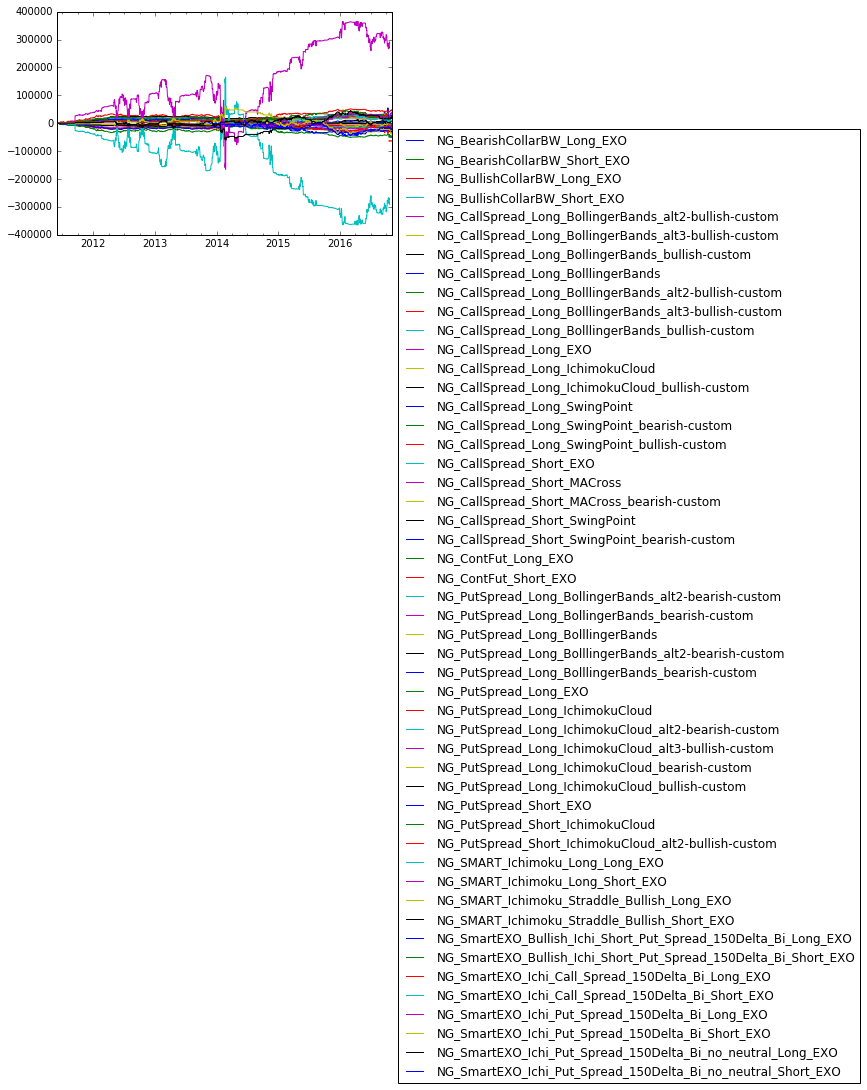

In [11]:
swmdf.plot().legend(loc='best', bbox_to_anchor=(1, 0.5));

# Campaign composition

In [15]:
 campaign_dict = {
            'name': 'NG_Bidirectional',
            'description': 'Bidirectional Expression of Natural Gas',
            'alphas': {
                'NG_CallSpread_Long_SwingPoint_bearish-custom': {
                    'qty': 1.0,
                },
             'NG_PutSpread_Long_BolllingerBands_alt2-bearish-custom': {
                    'qty': 1.0,
                },
             'NG_PutSpread_Long_IchimokuCloud_alt2-bearish-custom': {
                    'qty': 1.0,
                },
             'NG_PutSpread_Long_IchimokuCloud_bearish-custom': {
                    'qty': 1.0,
                },
             'NG_PutSpread_Short_IchimokuCloud_alt2-bullish-custom': {
                    'qty': 1.0,
                },
            'NG_PutSpread_Long_EXO': {
                    'qty': 1.0,
                },
            
            
            'NG_CallSpread_Long_BolllingerBands_alt2-bullish-custom': {
                    'qty': 1.0,
                },
             'NG_CallSpread_Long_BolllingerBands_alt3-bullish-custom': {
                    'qty': 1.0,
                },
             'NG_CallSpread_Long_BolllingerBands_bullish-custom': {
                    'qty': 1.0,
                },
             'NG_CallSpread_Long_IchimokuCloud_bullish-custom': {
                    'qty': 1.0,
                },
             'NG_CallSpread_Long_SwingPoint_bullish-custom': {
                    'qty': 1.0,
                },
            'NG_CallSpread_Short_SwingPoint_bearish-custom': {
                    'qty': 1.0,
                },
            'NG_PutSpread_Long_IchimokuCloud_alt3-bullish-custom': {
                    'qty': 1.0,
                },
            'NG_PutSpread_Long_IchimokuCloud_bullish-custom': {
                    'qty': 1.0,
                },
            'NG_PutSpread_Short_EXO': {
                    'qty': 1.0,
            }
        }
    }

In [16]:
cmp = Campaign(campaign_dict, datasource)

### Save campaign

In [17]:
exmgr.campaign_save(cmp)

## Campaign positions

### Alphas positions

In [18]:
pp.pprint(cmp.alphas_positions)

{   'NG_CallSpread_Long_BolllingerBands_alt2-bullish-custom': {   'exo_name': 'NG_CallSpread',
                                                                  'exposure': 0.0,
                                                                  'prev_exposure': 0.0},
    'NG_CallSpread_Long_BolllingerBands_alt3-bullish-custom': {   'exo_name': 'NG_CallSpread',
                                                                  'exposure': 0.0,
                                                                  'prev_exposure': 0.0},
    'NG_CallSpread_Long_BolllingerBands_bullish-custom': {   'exo_name': 'NG_CallSpread',
                                                             'exposure': 0.0,
                                                             'prev_exposure': 0.0},
    'NG_CallSpread_Long_IchimokuCloud_bullish-custom': {   'exo_name': 'NG_CallSpread',
                                                           'exposure': 0.0,
                                                  

### EXO net positions

In [19]:
pp.pprint(cmp.exo_positions)

{   'NG_CallSpread': {'exposure': -2.0, 'prev_exposure': -2.0},
    'NG_PutSpread': {'exposure': 6.0, 'prev_exposure': 6.0}}


### Contracts positions

In [20]:
pp.pprint(cmp.positions)

{   'C_US_NGEZ163200': {   'asset': {   '_id': ObjectId('57aae79834ac2255e5944c76'),
                                        '_type': 'opt',
                                        'callorput': 'C',
                                        'cqgsymbol': 'C.US.NGEZ163200',
                                        'expirationdate': datetime.datetime(2016, 11, 25, 0, 0),
                                        'idcontract': 4857,
                                        'idinstrument': 23,
                                        'idoption': 11543207,
                                        'name': 'C.US.NGEZ163200',
                                        'optionmonth': 'Z',
                                        'optionmonthint': 12,
                                        'optionname': 'C.US.NGEZ163200',
                                        'optionyear': 2016,
                                        'strikeprice': 3.2},
                           'prev_qty': -2.0,
                      